In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## LogReg baseline

In [2]:
baseline1 = pd.read_csv("LogReg_baseline_500.csv")
baseline2 = pd.read_csv("LogReg_baseline_1000.csv")

In [3]:
baseline1 = baseline1.mean(axis=0)

In [4]:
baseline2 = baseline2.mean(axis=0)

## Read in data (Abernethy)

In [5]:
part1 = pd.read_csv("01_loss_Abernethy.csv")
part2 = pd.read_csv('../Ruoyu/tmp_result/Abernethy_0.4 to 1_Overall_accuracy.csv')
part3 = pd.read_csv("01_loss_Shekhar.csv")
part4 = pd.read_csv('../Ruoyu/tmp_result/Shekhar_0.4 to 1_01_loss.csv')
part2.columns = ["index", "p","checkpoint","test error","demographic parity","equal_opportunity","equal odds","overall accuracy violation"]
part1.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
part4.columns = ["index", "p","checkpoint","test error","demographic parity","equal_opportunity","equal odds","overall accuracy violation"]
part3.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]

In [6]:
part1 = part1.loc[part1['p'] <= 0.5]
part2 = part2.loc[part2['p'] > 0.5]
part3 = part3.loc[part3['p'] <= 0.5]
part4 = part4.loc[part4['p'] > 0.5]

In [7]:
whole_ab = part1.append(part2)
whole_sh = part3.append(part4)

In [8]:
check_500_ab = whole_ab.loc[whole_ab['checkpoint'] == 500]
check_1000_ab = whole_ab.loc[whole_ab['checkpoint'] == 1000]
check_500_sh = whole_sh.loc[whole_sh['checkpoint'] == 500]
check_1000_sh = whole_sh.loc[whole_sh['checkpoint'] == 1000]

## Abernethy optimizing 01 loss (500 sample)

In [9]:
df_ab = []
# df.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
for i in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
    temp = check_500_ab.loc[np.abs(check_500_ab['p'] - i) < 1e-8].values[:, 2:]
    df_ab.append(np.mean(temp, axis=0))

In [10]:
df_sh = []
# df.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
for i in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
    temp = check_500_sh.loc[np.abs(check_500_sh['p'] - i) < 1e-8].values[:, 2:]
    df_sh.append(np.mean(temp, axis=0))

In [11]:
df_ab = pd.DataFrame(df_ab)
df_sh = pd.DataFrame(df_sh)

In [12]:
df_sh.columns = ["checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
df_ab.columns = ["checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]

In [13]:
sort_ab = df_ab.sort_values("test error")
sort_sh = df_sh.sort_values("test error")

In [14]:
test_error_frontier_ab = [sort_ab['test error'].iloc[0]]
overall_acc_frontier_ab = [sort_ab['overall accuracy violation'].iloc[0]]
test_error_frontier_sh = [sort_sh['test error'].iloc[0]]
overall_acc_frontier_sh = [sort_sh['overall accuracy violation'].iloc[0]]

In [15]:
index_ab = [0]
for i in range(1, 21):
    if sort_ab['overall accuracy violation'].iloc[i] < overall_acc_frontier_ab[-1]:
        index_ab.append(i)
        overall_acc_frontier_ab.append(sort_ab['overall accuracy violation'].iloc[i])
        test_error_frontier_ab.append(sort_ab['test error'].iloc[i])

In [16]:
index_sh = [0]
for i in range(1, 21):
    if sort_sh['overall accuracy violation'].iloc[i] < overall_acc_frontier_sh[-1]:
        index_sh.append(i)
        overall_acc_frontier_sh.append(sort_sh['overall accuracy violation'].iloc[i])
        test_error_frontier_sh.append(sort_sh['test error'].iloc[i])

Text(0.5, 0, 'overall accuracy violation')

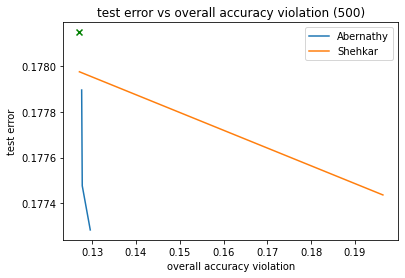

In [17]:
plt.plot(overall_acc_frontier_ab, test_error_frontier_ab, label="Abernathy")
plt.plot(overall_acc_frontier_sh, test_error_frontier_sh, label="Shehkar")
plt.legend()
plt.scatter(baseline1.loc["overall accuracy violation"], baseline1.loc["test error"], marker='x', c="g", label="Logistic Regression")
plt.title("test error vs overall accuracy violation (500)")
plt.ylabel("test error")
plt.xlabel("overall accuracy violation")
# plt.xlim(0.15, 0.2)
# plt.ylim(0.15, 0.2)

In [18]:
df_ab = sort_ab.iloc[index_ab]
df_sh = sort_sh.iloc[index_sh]

In [19]:
index_ab

[0, 1, 3]

In [20]:
test_error_frontier_ab = [df_ab['test error'].iloc[0]]
demographic_frontier_ab = [df_ab['demographic parity'].iloc[0]]
for i in range(len(index_ab)):
    if df_ab['demographic parity'].iloc[i] < demographic_frontier_ab[-1]:
        demographic_frontier_ab.append(df_ab['demographic parity'].iloc[i])
        test_error_frontier_ab.append(df_ab['test error'].iloc[i])

In [21]:
test_error_frontier_sh = [df_sh['test error'].iloc[0]]
demographic_frontier_sh = [df_sh['demographic parity'].iloc[0]]
for i in range(len(index_sh)):
    if df_sh['demographic parity'].iloc[i] < demographic_frontier_sh[-1]:
        demographic_frontier_sh.append(df_sh['demographic parity'].iloc[i])
        test_error_frontier_sh.append(df_sh['test error'].iloc[i])

Text(0.5, 0, 'demographic parity violation')

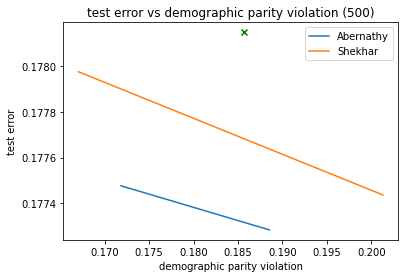

In [22]:
plt.plot(demographic_frontier_ab, test_error_frontier_ab, label = "Abernathy")
plt.plot(demographic_frontier_sh, test_error_frontier_sh, label = "Shekhar")
plt.legend()
plt.scatter(baseline1.loc["demographic parity"], baseline1.loc["test error"], marker='x', c="g", label="Logistic Regression")
plt.title("test error vs demographic parity violation (500)")
plt.ylabel("test error")
plt.xlabel("demographic parity violation")

Text(0.5, 0, 'equal odds violation')

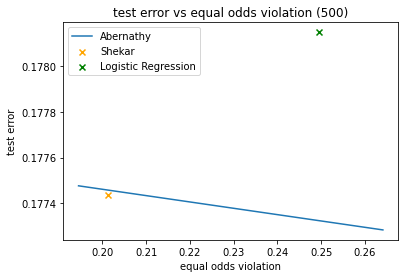

In [23]:
test_error_frontier_ab = [df_ab['test error'].iloc[0]]
equal_odds_frontier_ab = [df_ab['equal odds'].iloc[0]]
for i in range(len(index_ab)):
    if df_ab['equal odds'].iloc[i] < equal_odds_frontier_ab[-1]:
        equal_odds_frontier_ab.append(df_ab['equal odds'].iloc[i])
        test_error_frontier_ab.append(df_ab['test error'].iloc[i])


test_error_frontier_sh = [df_sh['test error'].iloc[0]]
equal_odds_frontier_sh = [df_sh['equal odds'].iloc[0]]
for i in range(len(index_sh)):
    if df_sh['equal odds'].iloc[i] < equal_odds_frontier_sh[-1]:
        equal_odds_frontier_sh.append(df_sh['equal odds'].iloc[i])
        test_error_frontier_sh.append(df_sh['test error'].iloc[i])
        
plt.plot(equal_odds_frontier_ab, test_error_frontier_ab, label="Abernathy")
plt.scatter(equal_odds_frontier_sh, test_error_frontier_sh, label="Shekar", marker='x', c="orange")
plt.scatter(baseline1.loc["equal odds"], baseline1.loc["test error"], marker='x', c="g", label="Logistic Regression")
plt.legend()
plt.title("test error vs equal odds violation (500)")
plt.ylabel("test error")
plt.xlabel("equal odds violation")

Text(0.5, 0, 'equal_opportunity violation')

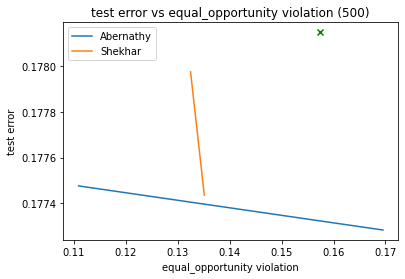

In [24]:
test_error_frontier_ab = [df_ab['test error'].iloc[0]]
equal_opportunity_frontier_ab = [df_ab['equal_opportunity'].iloc[0]]
for i in range(len(index_ab)):
    if df_ab['equal_opportunity'].iloc[i] < equal_opportunity_frontier_ab[-1]:
        equal_opportunity_frontier_ab.append(df_ab['equal_opportunity'].iloc[i])
        test_error_frontier_ab.append(df_ab['test error'].iloc[i])
        
test_error_frontier_sh = [df_sh['test error'].iloc[0]]
equal_opportunity_frontier_sh = [df_sh['equal_opportunity'].iloc[0]]
for i in range(len(index_sh)):
    if df_sh['equal_opportunity'].iloc[i] < equal_opportunity_frontier_sh[-1]:
        equal_opportunity_frontier_sh.append(df_sh['equal_opportunity'].iloc[i])
        test_error_frontier_sh.append(df_sh['test error'].iloc[i])
        
plt.plot(equal_opportunity_frontier_ab, test_error_frontier_ab, label="Abernathy")
plt.plot(equal_opportunity_frontier_sh, test_error_frontier_sh, label="Shekhar")
plt.legend()
plt.scatter(baseline1.loc["equal_opportunity"], baseline1.loc["test error"], marker='x', c="g", label="Logistic Regression")
plt.title("test error vs equal_opportunity violation (500)")
plt.ylabel("test error")
plt.xlabel("equal_opportunity violation")

## Abernethy optimizing 01 loss (1000 sample)

In [25]:
df_ab = []
# df.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
for i in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
    temp = check_1000_ab.loc[np.abs(check_1000_ab['p'] - i) < 1e-8].values[:, 2:]
    df_ab.append(np.mean(temp, axis=0))

In [26]:
df_sh = []
# df.columns = ["index", "p","checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
for i in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]:
    temp = check_1000_sh.loc[np.abs(check_1000_sh['p'] - i) < 1e-8].values[:, 2:]
    df_sh.append(np.mean(temp, axis=0))

In [27]:
df_sh = pd.DataFrame(df_sh)
df_sh.columns = ["checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]
df_ab = pd.DataFrame(df_ab)
df_ab.columns = ["checkpoint","test error","demographic parity","equal odds","equal_opportunity","overall accuracy violation"]

In [28]:
sort_ab = df_ab.sort_values("test error")
sort_sh = df_sh.sort_values("test error")

In [29]:
test_error_frontier_ab = [sort_ab['test error'].iloc[0]]
overall_acc_frontier_ab = [sort_ab['overall accuracy violation'].iloc[0]]
test_error_frontier_sh = [sort_sh['test error'].iloc[0]]
overall_acc_frontier_sh = [sort_sh['overall accuracy violation'].iloc[0]]

Text(0.5, 0, 'overall accuracy violation')

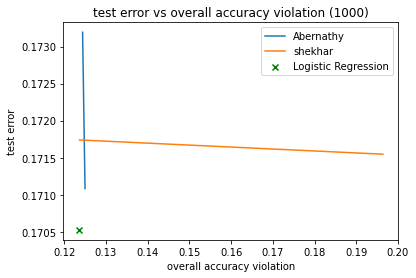

In [30]:
index_ab = [0]
for i in range(1, 21):
    if sort_ab['overall accuracy violation'].iloc[i] < overall_acc_frontier_ab[-1]:
        index_ab.append(i)
        overall_acc_frontier_ab.append(sort_ab['overall accuracy violation'].iloc[i])
        test_error_frontier_ab.append(sort_ab['test error'].iloc[i])
index_sh = [0]
for i in range(1, 21):
    if sort_sh['overall accuracy violation'].iloc[i] < overall_acc_frontier_sh[-1]:
        index_sh.append(i)
        overall_acc_frontier_sh.append(sort_sh['overall accuracy violation'].iloc[i])
        test_error_frontier_sh.append(sort_sh['test error'].iloc[i])

plt.plot(overall_acc_frontier_ab, test_error_frontier_ab, label="Abernathy")
plt.plot(overall_acc_frontier_sh, test_error_frontier_sh, label="shekhar")
plt.scatter(baseline2.loc["overall accuracy violation"], baseline2.loc["test error"], marker='x', c="g", label="Logistic Regression")
plt.legend()
plt.title("test error vs overall accuracy violation (1000)")
plt.ylabel("test error")
plt.xlabel("overall accuracy violation")

In [31]:
df_ab = sort_ab.iloc[index_ab]
df_sh = sort_sh.iloc[index_sh]

Text(0.5, 0, 'demographic parity violation')

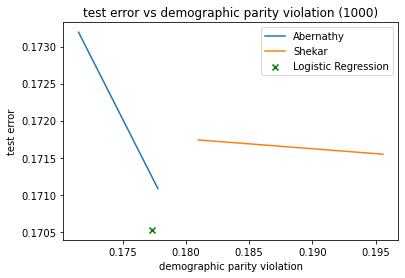

In [32]:
test_error_frontier_ab = [df_ab['test error'].iloc[0]]
demographic_frontier_ab = [df_ab['demographic parity'].iloc[0]]
for i in range(len(index_ab)):
    if df_ab['demographic parity'].iloc[i] < demographic_frontier_ab[-1]:
        demographic_frontier_ab.append(df_ab['demographic parity'].iloc[i])
        test_error_frontier_ab.append(df_ab['test error'].iloc[i])

test_error_frontier_sh = [df_sh['test error'].iloc[0]]
demographic_frontier_sh = [df_sh['demographic parity'].iloc[0]]
for i in range(len(index_sh)):
    if df_sh['demographic parity'].iloc[i] < demographic_frontier_sh[-1]:
        demographic_frontier_sh.append(df_sh['demographic parity'].iloc[i])
        test_error_frontier_sh.append(df_sh['test error'].iloc[i])

plt.plot(demographic_frontier_ab, test_error_frontier_ab, label="Abernathy")
plt.plot(demographic_frontier_sh, test_error_frontier_sh, label="Shekar")
plt.scatter(baseline2.loc["demographic parity"],baseline2.loc["test error"],  marker='x', c="g", label="Logistic Regression")
plt.legend()
plt.title("test error vs demographic parity violation (1000)")
plt.ylabel("test error")
plt.xlabel("demographic parity violation")

Text(0.5, 0, 'equal odds violation')

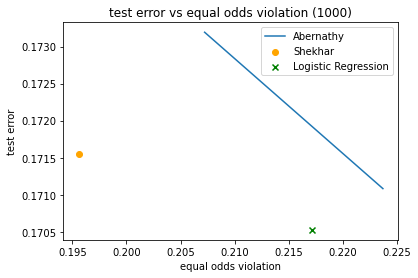

In [33]:
test_error_frontier_ab = [df_ab['test error'].iloc[0]]
equal_odds_frontier_ab = [df_ab['equal odds'].iloc[0]]
for i in range(len(index_ab)):
    if df_ab['equal odds'].iloc[i] < equal_odds_frontier_ab[-1]:
        equal_odds_frontier_ab.append(df_ab['equal odds'].iloc[i])
        test_error_frontier_ab.append(df_ab['test error'].iloc[i])
        
test_error_frontier_sh = [df_sh['test error'].iloc[0]]
equal_odds_frontier_sh = [df_sh['equal odds'].iloc[0]]
for i in range(len(index_sh)):
    if df_sh['equal odds'].iloc[i] < equal_odds_frontier_sh[-1]:
        equal_odds_frontier_sh.append(df_sh['equal odds'].iloc[i])
        test_error_frontier_sh.append(df_sh['test error'].iloc[i])
        
plt.plot(equal_odds_frontier_ab, test_error_frontier_ab, label='Abernathy')
plt.scatter(equal_odds_frontier_sh, test_error_frontier_sh, label="Shekhar", c='orange')
plt.scatter(baseline2.loc["equal odds"], baseline2.loc["test error"], marker='x', c="g", label='Logistic Regression')
plt.legend()
plt.title("test error vs equal odds violation (1000)")
plt.ylabel("test error")
plt.xlabel("equal odds violation")

Text(0.5, 0, 'equal_opportunity violation')

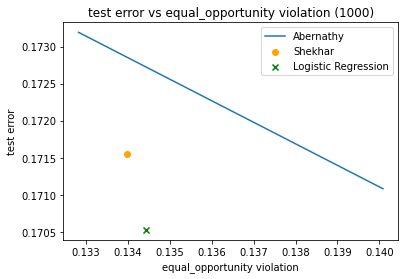

In [34]:
test_error_frontier_ab = [df_ab['test error'].iloc[0]]
equal_opportunity_frontier_ab = [df_ab['equal_opportunity'].iloc[0]]
for i in range(len(index_ab)):
    if df_ab['equal_opportunity'].iloc[i] < equal_opportunity_frontier_ab[-1]:
        equal_opportunity_frontier_ab.append(df_ab['equal_opportunity'].iloc[i])
        test_error_frontier_ab.append(df_ab['test error'].iloc[i])
test_error_frontier_sh = [df_sh['test error'].iloc[0]]
equal_opportunity_frontier_sh = [df_sh['equal_opportunity'].iloc[0]]
for i in range(len(index_sh)):
    if df_sh['equal_opportunity'].iloc[i] < equal_opportunity_frontier_sh[-1]:
        equal_opportunity_frontier_sh.append(df_sh['equal_opportunity'].iloc[i])
        test_error_frontier_sh.append(df_sh['test error'].iloc[i])
             
plt.plot(equal_opportunity_frontier_ab, test_error_frontier_ab, label="Abernathy")
plt.scatter(equal_opportunity_frontier_sh, test_error_frontier_sh, label="Shekhar", c='orange')
plt.scatter(baseline2.loc["equal_opportunity"],baseline2.loc["test error"], marker='x', c="g", label="Logistic Regression")
plt.legend()
plt.title("test error vs equal_opportunity violation (1000)")
plt.ylabel("test error")
plt.xlabel("equal_opportunity violation")